# Can a Neural Network Learn an Algebraic Object?

One of the most important concept in all science (and in everyday life) is the group structure. Simply, a group is an object that satisfies 4 algebraic properties:


1.   Closure.
2.   Identity.
3.   Inverses.
4.   Associativity.

We say, **a set has the group structure if it satisfies the afore mentioned 4 properties**. Some known examples of groups are:

1.   The integer numbers.
2.   The rational numbers.
3.   Module numbers.
4.   Permutations (which we will use now).




The dataset was manually created. For the positive target, we use random generated items and artificially guaranteeing the 4 properties required to be a group. For the negative target, we randomly selected a subsets.


Note: The $S_6$ permutations has $6\cdot 5\cdot 4\cdot 3\cdot 2 = 720$ elements (the number of different permutations). The number of possible subsets is $2^{720}$ from which only less than 1500 subsets have the group structure. With almost 100% certainty, every sample will omit exotic non-group cases.

So for no one's surprise, **any attemp to learn the group structure will have an inherent bias.**

## Load Dataset

Load the dataset to Google colab:

In [ ]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["S6_dataset.csv"]))

Saving S6_dataset.csv to S6_dataset.csv


We have no duplicates on the dataset.

In [ ]:
duplicates = sum(df.duplicated())
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


The dataset has:

In [ ]:
import numpy as np
X = df[df.columns[range(720)]]
y = df["target"]
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(y)
n_classes = len(classes)
print(f"Numbers of Examples (rows): {n_rows}")
print(f"Number of Inputs (feature columns): {n_cols}")
print(f"Number of Classes: {n_classes}")
print(f"Classes: {classes}")
print("Class Breakdown:")
breakdown = ""
for c in classes:
	total = len(y[y == c])
	ratio = (total / float(len(y))) * 100
	print(f" - Class {str(c)}: {total} ({ratio:.1f}%)")

Numbers of Examples (rows): 101017
Number of Inputs (feature columns): 720
Number of Classes: 2
Classes: [0 1]
Class Breakdown:
 - Class 0: 100000 (99.0%)
 - Class 1: 1017 (1.0%)


## Train Test Split

We split the data into Train and Test sets. Test will be used to validate the results obtained.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)
print(f"X_train shape: {X_train.shape} - X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} - y_test shape: {y_test.shape}")
print("\n")
print(f"Total of positive cases in training set: {sum(y_train)}")
print(f"Total of positive cases in testing set: {sum(y_test)}")

X_train shape: (70711, 720) - X_test shape: (30306, 720)
y_train shape: (70711,) - y_test shape: (30306,)


Total of positive cases in training set: 712
Total of positive cases in testing set: 305


## Neural Network Classifier

We are building a simple Feed Forward Neural Network Classifier. With Dense neurons layers, and Dropout layers, to **force the network to optimize the validation data**.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

The neural network structure is as follows.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 720)]             0         
_________________________________________________________________
dropout (Dropout)            (None, 720)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                46144     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65    

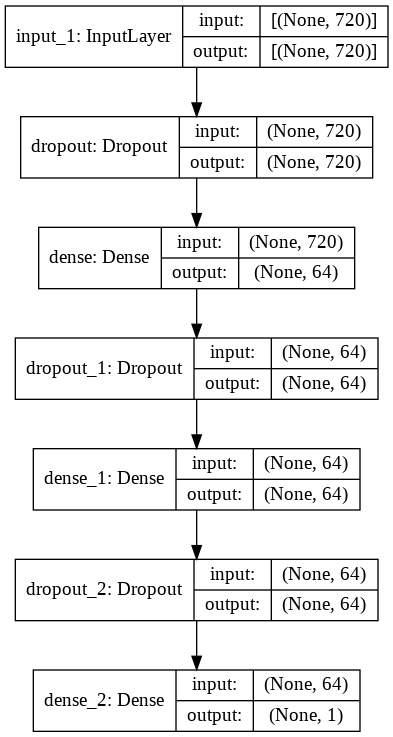

In [ ]:
clf_in = keras.layers.Input(shape=(X.shape[1], ))
drop1 = keras.layers.Dropout(0.6)(clf_in)
dense1 = keras.layers.Dense(64, activation="relu")(drop1)
drop2 = keras.layers.Dropout(0.4)(dense1)
dense2 = keras.layers.Dense(64, activation="relu")(drop2)
drop3 = keras.layers.Dropout(0.2)(dense2)
clf_out = keras.layers.Dense(1, activation="relu")(drop3)
classifier = keras.Model(inputs=clf_in, outputs=clf_out)
print(classifier.summary())
keras.utils.plot_model(classifier, show_shapes=True)

Before feeding the Network, we manually split the dataset to **have a validation set with positive samples**. Because the ratio on this dataset is lower than $\frac{1}{100}$.

In [ ]:
X_feed, X_val, y_feed, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3, random_state=456)
print(f"Total of positive cases in feeding set: {sum(y_feed)}")
print(f"Total of positive cases in validating set: {sum(y_val)}")

Total of positive cases in feeding set: 498
Total of positive cases in validating set: 214


In [ ]:
classifier.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
history = classifier.fit(X_feed, y_feed, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
1547/1547 [==============================] - 8s 5ms/step - loss: 0.0573 - accuracy: 0.9945 - val_loss: 0.0078 - val_accuracy: 0.9992
Epoch 2/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0051 - accuracy: 0.9995 - val_loss: 0.0084 - val_accuracy: 0.9992
Epoch 3/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0069 - val_accuracy: 0.9994
Epoch 4/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0061 - val_accuracy: 0.9994
Epoch 5/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0046 - val_accuracy: 0.9996
Epoch 6/50
1547/1547 [==============================] - 5s 3ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0060 - val_accuracy: 0.9995
Epoch 7/50
1547/1547 [==============================] - 5s 3ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 0.0053 - val_accuracy:

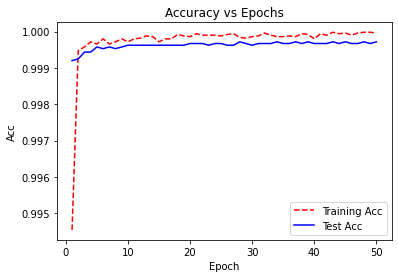

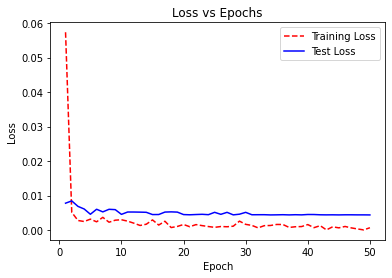

In [ ]:
epoch_count = range(1, len(history.history["accuracy"])+1)
plt.plot(epoch_count, history.history["accuracy"], "r--")
plt.plot(epoch_count, history.history["val_accuracy"], "b-")
plt.legend(["Training Acc", "Test Acc"])
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Accuracy vs Epochs")
plt.show()
#
plt.plot(epoch_count, history.history["loss"], "r--")
plt.plot(epoch_count, history.history["val_loss"], "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

Note: **There is a local minimum that classifies all data as non group**.

In [ ]:
prediction = classifier.predict(X_test)
y_pred = [1 if i >= 1 else 0 for i in prediction]

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)} \n")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Confusion Matrix: 
 [[30001     0]
 [    7   298]] 

F1 Score: 0.988391376451078


## Conclusion

**Not only can it learn the group structure. But it does it with an incredible precision.**



# Second Attemp

One guess we have, is that **the identity element is helping too much to classify the non-group sets**. As not having an identity (having a 0 in the first column) is a infallible indicator that the set could not be a group.

So, we repeat the attemp but droping the first column, to verify if the neural network can understand what a group is, only loking for the 3 left properties.

In [ ]:
df.drop(columns=df.columns[0], inplace=True)
print(f"New dataframe shape: {df.shape}")

New dataframe shape: (101017, 720)


In [ ]:
X = df.drop(columns="target")
y = df["target"]

## Train Test Split

Same as before, we split the data into Train and Test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=789)
print(f"X_train shape: {X_train.shape} - X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} - y_test shape: {y_test.shape}")
print("\n")
print(f"Total of positive cases in training set: {sum(y_train)}")
print(f"Total of positive cases in testing set: {sum(y_test)}")

X_train shape: (70711, 719) - X_test shape: (30306, 719)
y_train shape: (70711,) - y_test shape: (30306,)


Total of positive cases in training set: 712
Total of positive cases in testing set: 305


## Neural Network Classifier

We will use the same neural network structure

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 719)]             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 719)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                46080     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65  

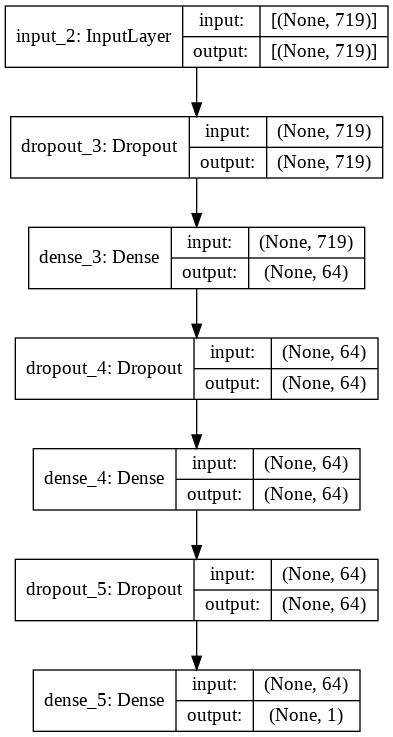

In [ ]:
clf_in = keras.layers.Input(shape=(X_train.shape[1], ))
drop1 = keras.layers.Dropout(0.6)(clf_in)
dense1 = keras.layers.Dense(64, activation="relu")(drop1)
drop2 = keras.layers.Dropout(0.4)(dense1)
dense2 = keras.layers.Dense(64, activation="relu")(drop2)
drop3 = keras.layers.Dropout(0.2)(dense2)
clf_out = keras.layers.Dense(1, activation="relu")(drop3)
classifier = keras.Model(inputs=clf_in, outputs=clf_out)
print(classifier.summary())
keras.utils.plot_model(classifier, show_shapes=True)

In [ ]:
X_feed, X_val, y_feed, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3, random_state=456)
print(f"Total of positive cases in feeding set: {sum(y_feed)}")
print(f"Total of positive cases in validating set: {sum(y_val)}")

Total of positive cases in feeding set: 498
Total of positive cases in validating set: 214


In [ ]:
classifier.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
history = classifier.fit(X_feed, y_feed, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
1547/1547 [==============================] - 9s 5ms/step - loss: 0.0304 - accuracy: 0.9960 - val_loss: 0.0111 - val_accuracy: 0.9989
Epoch 2/50
1547/1547 [==============================] - 5s 3ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.0078 - val_accuracy: 0.9992
Epoch 3/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0067 - accuracy: 0.9993 - val_loss: 0.0070 - val_accuracy: 0.9995
Epoch 4/50
1547/1547 [==============================] - 7s 4ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.0077 - val_accuracy: 0.9994
Epoch 5/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0061 - val_accuracy: 0.9995
Epoch 6/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch 7/50
1547/1547 [==============================] - 6s 4ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.0075 - val_accuracy:

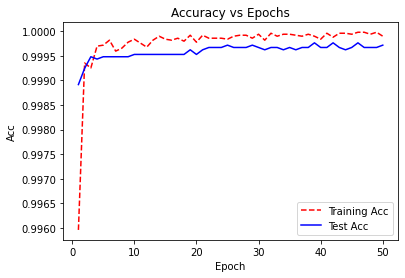

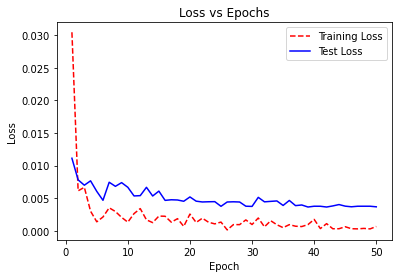

In [ ]:
epoch_count = range(1, len(history.history["accuracy"])+1)
plt.plot(epoch_count, history.history["accuracy"], "r--")
plt.plot(epoch_count, history.history["val_accuracy"], "b-")
plt.legend(["Training Acc", "Test Acc"])
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.title("Accuracy vs Epochs")
plt.show()
#
plt.plot(epoch_count, history.history["loss"], "r--")
plt.plot(epoch_count, history.history["val_loss"], "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

In [ ]:
prediction = classifier.predict(X_test)
y_pred = [1 if i >= 1 else 0 for i in prediction]
confusion_matrix(y_test, y_pred)

array([[30001,     0],
       [   11,   294]])

## Conslusion

If we only consider the 1, 3 and 4 properties. The same simple neural network can learn the group structure with an high speed and an incredible precision.

Editor's Note: I think the neural network can understand the inverses concept well enough to distinguish when it comes to a group structure.